here is a simple example of how you might use a linear regression model to predict the Russell 2000 stock price 5 days ahead.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
# Download historical data
start_date = (datetime.now() - timedelta(days=2000)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')
data = yf.download('^RUT', start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^RUT,^RUT,^RUT,^RUT,^RUT,^RUT
Date,,,,,,
2019-05-21 00:00:00+00:00,1545.250000,1545.250000,1545.979980,1529.819946,1529.819946,3223050000
2019-05-22 00:00:00+00:00,1531.630005,1531.630005,1542.579956,1528.359985,1542.579956,3194000000
2019-05-23 00:00:00+00:00,1501.380005,1501.380005,1525.069946,1493.479980,1525.069946,3899320000
2019-05-24 00:00:00+00:00,1514.109985,1514.109985,1516.660034,1505.760010,1505.880005,2889230000
2019-05-28 00:00:00+00:00,1504.020020,1504.020020,1520.219971,1503.810059,1514.989990,4146980000
...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,2219.030029,2219.030029,2233.189941,2200.300049,2206.560059,3602060000
2024-11-05 00:00:00+00:00,2260.840088,2260.840088,2260.919922,2212.270020,2216.620117,3768310000


In [3]:
# Prepare data for model
data['Prediction'] = data['Close'].shift(-5)
display(data)
X = np.array(data.drop(['Prediction'], axis=1))[:-5]
display(X[:5])
y = np.array(data['Prediction'])[:-5]
display(y[:5])

Price,Adj Close,Close,High,Low,Open,Volume,Prediction
Ticker,^RUT,^RUT,^RUT,^RUT,^RUT,^RUT,
Date,,,,,,,
2019-05-21 00:00:00+00:00,1545.250000,1545.250000,1545.979980,1529.819946,1529.819946,3223050000,1489.949951
2019-05-22 00:00:00+00:00,1531.630005,1531.630005,1542.579956,1528.359985,1542.579956,3194000000,1485.530029
2019-05-23 00:00:00+00:00,1501.380005,1501.380005,1525.069946,1493.479980,1525.069946,3899320000,1465.489990
2019-05-24 00:00:00+00:00,1514.109985,1514.109985,1516.660034,1505.760010,1505.880005,2889230000,1469.979980
2019-05-28 00:00:00+00:00,1504.020020,1504.020020,1520.219971,1503.810059,1514.989990,4146980000,1508.560059
...,...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,2219.030029,2219.030029,2233.189941,2200.300049,2206.560059,3602060000,NaN
2024-11-05 00:00:00+00:00,2260.840088,2260.840088,2260.919922,2212.270020,2216.620117,3768310000,NaN


array([[1.54525000e+03, 1.54525000e+03, 1.54597998e+03, 1.52981995e+03,
        1.52981995e+03, 3.22305000e+09],
       [1.53163000e+03, 1.53163000e+03, 1.54257996e+03, 1.52835999e+03,
        1.54257996e+03, 3.19400000e+09],
       [1.50138000e+03, 1.50138000e+03, 1.52506995e+03, 1.49347998e+03,
        1.52506995e+03, 3.89932000e+09],
       [1.51410999e+03, 1.51410999e+03, 1.51666003e+03, 1.50576001e+03,
        1.50588000e+03, 2.88923000e+09],
       [1.50402002e+03, 1.50402002e+03, 1.52021997e+03, 1.50381006e+03,
        1.51498999e+03, 4.14698000e+09]])

array([1489.94995117, 1485.5300293 , 1465.48999023, 1469.97998047,
       1508.56005859])

In [4]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# Get the last 'x' rows of the feature data set
x_future = np.array(data.drop(['Prediction'], axis=1))[:-5]
x_future = x_future[-5:]
x_future = np.array(x_future)
x_future

array([[2.24407007e+03, 2.24407007e+03, 2.24737988e+03, 2.21766992e+03,
        2.21766992e+03, 3.69128000e+09],
       [2.23809009e+03, 2.23809009e+03, 2.23809009e+03, 2.22175000e+03,
        2.23651001e+03, 3.87910000e+09],
       [2.23304004e+03, 2.23304004e+03, 2.26047998e+03, 2.22979004e+03,
        2.23265991e+03, 3.85112000e+09],
       [2.19664990e+03, 2.19664990e+03, 2.23215991e+03, 2.19664990e+03,
        2.23137012e+03, 4.42566000e+09],
       [2.21012988e+03, 2.21012988e+03, 2.22735010e+03, 2.20217993e+03,
        2.20217993e+03, 3.79645000e+09]])

In [8]:
# Print the predictions for the next 'n' days
lr_prediction = model.predict(x_future)
print(lr_prediction)

[2239.15654846 2228.43097585 2237.55206065 2195.2660981  2212.03297195]


In [9]:
display(data)

Price,Adj Close,Close,High,Low,Open,Volume,Prediction
Ticker,^RUT,^RUT,^RUT,^RUT,^RUT,^RUT,
Date,,,,,,,
2019-05-21 00:00:00+00:00,1545.250000,1545.250000,1545.979980,1529.819946,1529.819946,3223050000,1489.949951
2019-05-22 00:00:00+00:00,1531.630005,1531.630005,1542.579956,1528.359985,1542.579956,3194000000,1485.530029
2019-05-23 00:00:00+00:00,1501.380005,1501.380005,1525.069946,1493.479980,1525.069946,3899320000,1465.489990
2019-05-24 00:00:00+00:00,1514.109985,1514.109985,1516.660034,1505.760010,1505.880005,2889230000,1469.979980
2019-05-28 00:00:00+00:00,1504.020020,1504.020020,1520.219971,1503.810059,1514.989990,4146980000,1508.560059
...,...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,2219.030029,2219.030029,2233.189941,2200.300049,2206.560059,3602060000,NaN
2024-11-05 00:00:00+00:00,2260.840088,2260.840088,2260.919922,2212.270020,2216.620117,3768310000,NaN


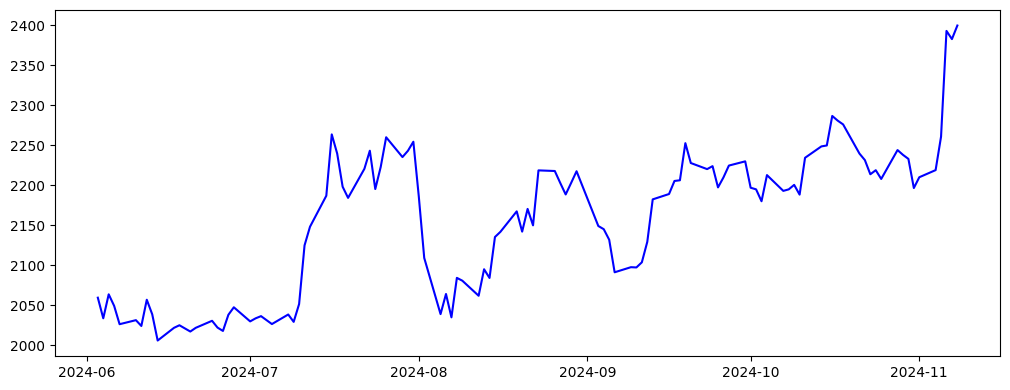

In [10]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(data['Close']['2024-06-03':], color='b', label='Close');

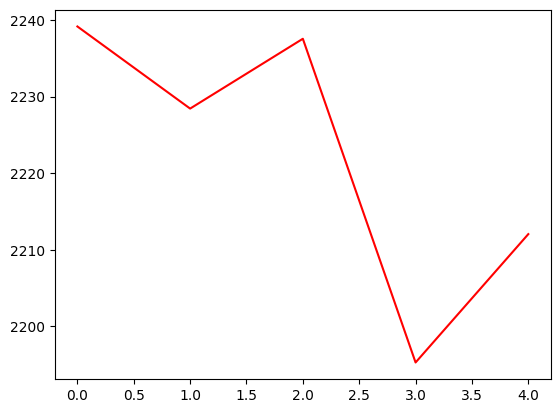

In [11]:
plt.plot(lr_prediction, color='r', label='Prediction');

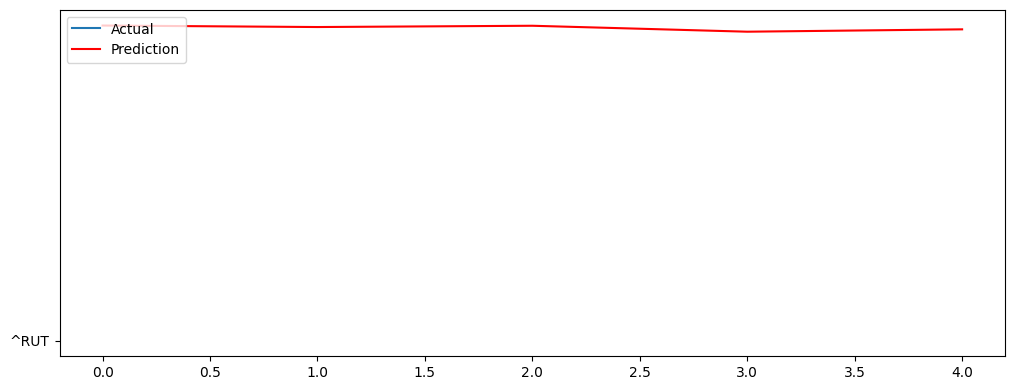

In [12]:
actual = list(data[-5:]['Close'])

plt.figure(figsize=(12.2, 4.5))
plt.plot(actual, label='Actual')
plt.plot(lr_prediction, color='r', label='Prediction')
plt.legend(loc='upper left')
plt.show()

#### Conclusion  
2059.679931640625, 2033.93994140625, 2063.8701171875, 2049.43994140625, 2026.550048828125

[2051.62921322 2058.74260807 2030.41457742 2044.29398586 2079.85233494]

---------

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [14]:
data = yf.download('^RUT', start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^RUT,^RUT,^RUT,^RUT,^RUT,^RUT
Date,,,,,,
2019-05-21 00:00:00+00:00,1545.250000,1545.250000,1545.979980,1529.819946,1529.819946,3223050000
2019-05-22 00:00:00+00:00,1531.630005,1531.630005,1542.579956,1528.359985,1542.579956,3194000000
2019-05-23 00:00:00+00:00,1501.380005,1501.380005,1525.069946,1493.479980,1525.069946,3899320000
2019-05-24 00:00:00+00:00,1514.109985,1514.109985,1516.660034,1505.760010,1505.880005,2889230000
2019-05-28 00:00:00+00:00,1504.020020,1504.020020,1520.219971,1503.810059,1514.989990,4146980000
...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,2219.030029,2219.030029,2233.189941,2200.300049,2206.560059,3602060000
2024-11-05 00:00:00+00:00,2260.840088,2260.840088,2260.919922,2212.270020,2216.620117,3768310000


In [15]:
prices = data['Close'].values.reshape(-1, 1)
prices

array([[1545.25      ],
       [1531.63000488],
       [1501.38000488],
       ...,
       [2392.91992188],
       [2382.68994141],
       [2399.63989258]])

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)


In [17]:
# Create input sequences and target values
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_prices, seq_length)

In [18]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [19]:
# Build an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1720
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014
Epoch 13/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014
Epoch 14/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 15/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 16/50
35/35 

In [21]:
# Make predictions for the next 5 days
predicted_prices = []
current_sequence = X_test[-1].reshape(1, seq_length, 1)

for _ in range(5):
    prediction = model.predict(current_sequence)[0]
    predicted_prices.append(prediction)
    current_sequence = np.append(current_sequence[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


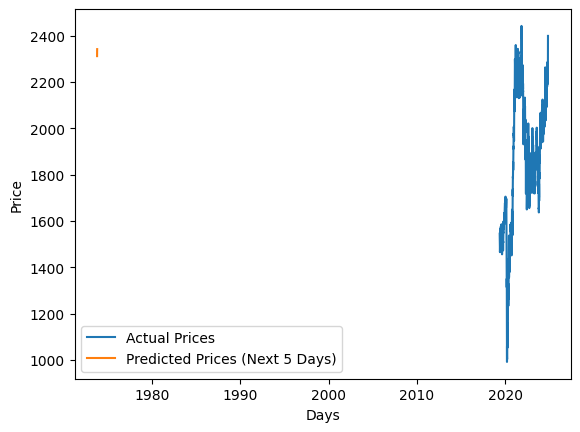

In [22]:
# Plot the results
plt.plot(data.index, prices, label='Actual Prices')
plt.plot(range(len(prices), len(prices) + 5), predicted_prices, label='Predicted Prices (Next 5 Days)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()